### 1. 문제 정의
- 탑승객의 정보를 바탕으로 생존자/사망자 예측
- Kaggle 경진대회에서 높은 순위를 차지
- 머신러닝 과정 전체를 체험 해보는 예제


### 2. 데이터 수집
- Kaggle 사이트로부터 train,test 다운로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # 시각화 라이브러리

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 3. 데이터 전처리
- 불필요한 컬럼 삭제
- 결측치 채우기(데이터 삭제, 기술통계, 상관계수를 통한 대체값)
- 특성공학
- 새로운 컬럼 만들기
- 범주형 데이터로 바꾸기
- 모든 컬럼 수치화

In [5]:
# 데이터의 크기
train.shape # 정답 컬럼 포함하기에(12)

(891, 12)

In [6]:
test.shape # 정답 컬럼 없기에(11)

(418, 11)

In [7]:
# 결측치 여부
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
# PassengerId - 데이터 구분 빗는 용도 -> 삭제
train.drop('PassengerId', axis=1, inplace=True)

In [11]:
# train, test 모두 동일하게 전처리 해주어야 함
test.drop('PassengerId', axis=1, inplace=True)

In [12]:
print(train.shape)
print(test.shape)

(891, 11)
(418, 10)


##### Embarked 결측치 채우기

In [13]:
# 범주형 데이터 (s, c, q)
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train['Embarked'].fillna('S', inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


##### Fare 결측치 채우기

In [17]:
# 다른 컬럼과의 상관관계를 이용해 결측치 채워보기
# -1~1 사이 값을 갖는다
# 하나의 특성이 증가할 때 다른 특성이 얼만큼 증가(+)/감소(-) 하는지 수치로 나타냄
# 절댓값을 통해 볼 수 있음
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Pclass가 가장 높은 상관관계를 갖는다
- 생존과 관련이 많을 것 같은 성별을 함께 그루핑에 활용해보자

In [18]:
# 각각 몇 개의 컬럼만 뽑아 통계치를 확인하고 싶을 때
pt1 = train.pivot_table(values='Fare',   # 확인하고 싶은 통계
                  index=['Pclass', 'Sex'], # 몇개의 컬럼
                  aggfunc='mean') # 통계치

In [19]:
# 멀티 인덱스
pt1

Fare
Pclass Sex               
1      female  106.125798
       male     67.226127
2      female   21.970121
       male     19.741782
3      female   16.118810
       male     12.661633

In [20]:
# 하나의 결측치 확인 (불리언 인덱싱)
test[ test['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [21]:
# pt1을 활용하여 결측치 채우기 (좀 더 유사한 값일 확률이 높겠죠?)
test['Fare'].fillna(12.661633, inplace=True)

In [22]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


##### Age 결측치 채우기

In [24]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [25]:
pt2 = train.pivot_table(values='Age',
                  index=['Pclass', 'Sex'],
                  aggfunc='mean')

In [26]:
# 많은 결측치를 함수를 통해 채우기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [27]:
# pclass 1, female 나이 가져오기
pt2.loc[1, 'female'][0]

34.61176470588235

In [28]:
# pclass 3, male 나이 가져오기
pt2.loc[3, 'male'][0]

26.507588932806325

In [29]:
# 함수 생성
def fill_age(row):
    # 만약 나이가 결측치라면 pt2의 값을 가져오고
    if np.isnan(row['Age']):
        return pt2.loc[row['Pclass'], row['Sex']][0]
    # 그렇지 않으면(결측치가 아니라면) 원래 나이 값 사용
    else:
        return row['Age']

In [30]:
# 내가 만든 함수를 apply로 적용
# 적용 후 데이터 타입을 변경후 컬럼 변경
train['Age'] = train.apply(fill_age, axis=1).astype('int64')

In [31]:
# test에도 적용
test['Age'] = test.apply(fill_age, axis=1).astype('int64')

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 76.7+ KB


In [33]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


##### Cabin 결측치 채우기

In [34]:
train['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

- 결측치를 하나의 데이터로 활용
- Cabin의 범주가 너무 많으므로 종류를 줄여보자

In [35]:
# 너무 많은 결측치 -> 자체 의미로 두자
train.fillna('M', inplace=True)
test.fillna('M', inplace=True)

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    int64  
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     418 non-null    object 
 9   Embarked  418 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 32.8+ KB


In [37]:
train['Cabin'].str[0]

0      M
1      C
2      M
3      C
4      M
      ..
886    M
887    B
888    M
889    C
890    M
Name: Cabin, Length: 891, dtype: object

In [38]:
# 구역 정보 간추리기
train['Cabin'] = train['Cabin'].str[0]

In [39]:
train['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [40]:
test['Cabin'] = test['Cabin'].str[0]

### 4. 탐색적 데이터 분석(EDA)

##### 범주형 데이터 시각화
- 빈도 기반의 bar chart 많이 활용

##### Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

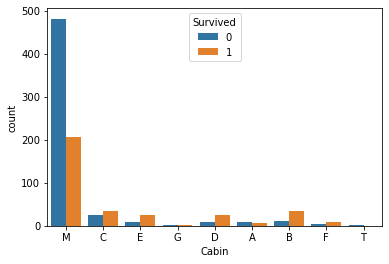

In [41]:
sns.countplot(data=train,
              x='Cabin',
              hue='Survived')

- M에서 상대적으로 많은 사람이 사망함. 모델 학습에 시켜봐도 될 것 같음

##### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

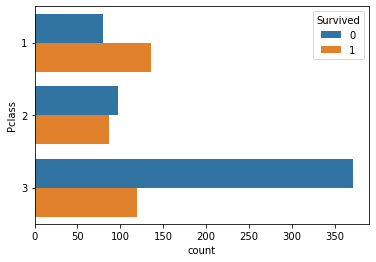

In [42]:
sns.countplot(data=train,
              y='Pclass',
              hue='Survived')

- 1등급에 탑승하면 생존 확률이 조금 있다
- 3등급에 탑승하면 사망 확률이 높다.
- Pclass를 모델 학습에 이용해봐도 좋을 것 같다.

##### Pclass, Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

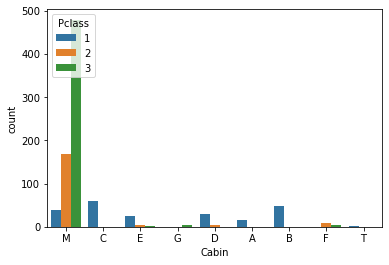

In [43]:
sns.countplot(data=train,
              x='Cabin',
              hue='Pclass')

- A,B,C에는 1등급 사람들이 탔다.
- M은 3등급 사람들이 많이 탑승했다 ->  3등급 사람들이 많이 사망해서 정보가 손실되었나?

##### Embarked, Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

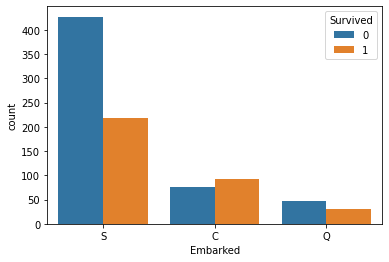

In [44]:
sns.countplot(data=train,
              x='Embarked',
              hue='Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

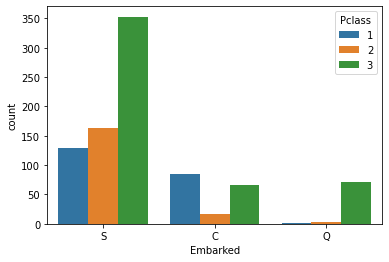

In [45]:
sns.countplot(data=train,
              x='Embarked',
              hue='Pclass')

<AxesSubplot:xlabel='Sex', ylabel='count'>

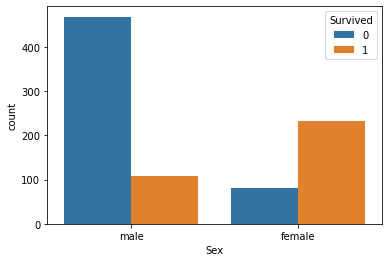

In [46]:
sns.countplot(data=train,
              x='Sex',
              hue='Survived')

##### 수치형 데이터
- 구간을 나눠서 종합하는 히스토그램

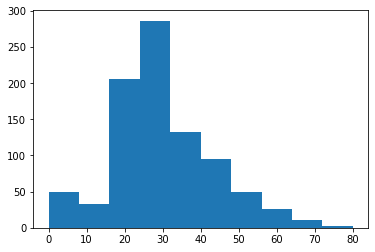

In [47]:
plt.hist(train['Age'])
plt.show()

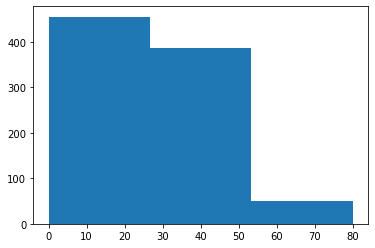

In [48]:
plt.hist(train['Age'], bins=3)
plt.show()

##### Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

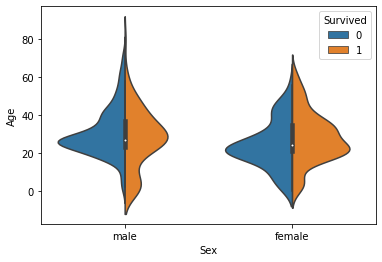

In [49]:
sns.violinplot(data=train,
               y='Age',
               x='Sex',
               hue='Survived',
               split=True)

- 20대 남성이 조금 많이 사망
- 어린아이 중 남자 아이는 생존 확률이 높다(여자 아이는 조금 낮은 편, 시대적 배경 생각해 볼 필요가 있음)

##### Fare 시각화

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

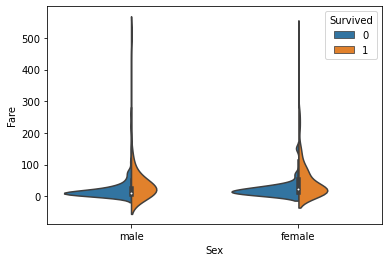

In [50]:
sns.violinplot(data=train,
               y='Fare',
               x='Sex',
               hue='Survived',
               split='True')

- 전체 요금이 0~40달러 사이에 많이 분포되어 있음.
- 낮은 요금을 지불한 사람들은 상대적으로 많이 사망

##### 특성공학
- SibSp 와 parch를 합쳐서 '가족'이라는 새로운 컬럼 생성

In [51]:
train['Family_Size']=train['SibSp']+train['Parch']+1
test['Family_Size']=test['SibSp']+test['Parch']+1

In [52]:
test['Family_Size']

0      1
1      2
2      1
3      1
4      3
      ..
413    1
414    1
415    1
416    1
417    3
Name: Family_Size, Length: 418, dtype: int64

<AxesSubplot:xlabel='Family_Size', ylabel='count'>

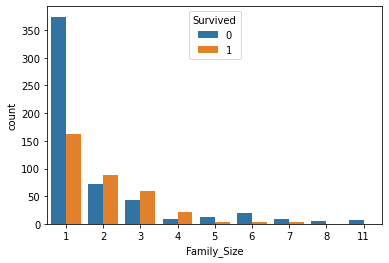

In [53]:
sns.countplot(data=train,
              x='Family_Size',
              hue='Survived')

- 1명 일때는 사망 비율이 높다
- 2~4명 일때는 생존 비율이 조금 더 높다.
- 5명 이상인 경우 사망 비율이 조금 더 높다.
- Binning(수치형 -> 범주형) 사소한 관찰 오류를 줄여줌.(모델의 단순화 유도)
- Family_Size라는 수치 데이커를 그대로 사용해도 좋지만, 범주형 데이터로 변환해보자!

##### 특성공학
- 가족 수 1명 - Alone, 2~4명이면 small, 5명 이상이면 Large 범주로 변경할 것
- cut 함수 활용

In [54]:
bins = [0,1,4,20] # 잘라낼 구간
labels = ['Alone', 'Small', 'Large'] # 구간별 범주 이름
train['Family_Group']=pd.cut(x=train['Family_Size'],
       bins=bins,
       labels=labels)

In [55]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small


In [56]:
test['Family_Group']=pd.cut(x=test['Family_Size'],
       bins=bins,
       labels=labels)

In [57]:
test['Family_Group']

0      Alone
1      Small
2      Alone
3      Alone
4      Small
       ...  
413    Alone
414    Alone
415    Alone
416    Alone
417    Small
Name: Family_Group, Length: 418, dtype: category
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_Group', ylabel='count'>

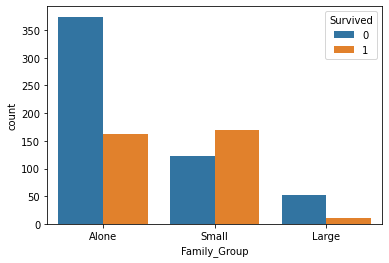

In [58]:
sns.countplot(data=train,
              x='Family_Group',
              hue='Survived')

##### 특성공학
- Name 컬럼 : 중간에 있는 호칭을 뽑아서 정형화 시켜보자!
- text 데이터(비정형 데이터)

In [59]:
train['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [60]:
'Braund, Mr. Owen Harris'.split(',')

['Braund', ' Mr. Owen Harris']

In [61]:
'Braund, Mr. Owen Harris'.split(',')[1]

' Mr. Owen Harris'

In [62]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0]

' Mr'

In [63]:
'Braund, Mr. Owen Harris'.split(',')[1].split('.')[0].strip()

'Mr'

In [64]:
# 함수 생성
def split_title(row):
    return row.split(',')[1].split('.')[0].strip()

In [65]:
train['Title']=train['Name'].apply(split_title)

In [66]:
test['Title']=test['Name'].apply(split_title)

In [67]:
train.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,M,S,2,Small,Mr


In [68]:
# 정형화된 호칭 종류 확인
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

<AxesSubplot:xlabel='Title', ylabel='count'>

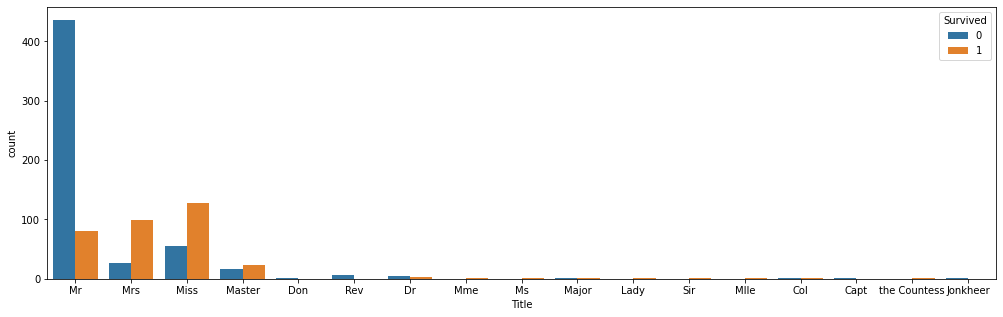

In [69]:
plt.figure(figsize=(17,5)) # 가로, 세로
sns.countplot(data=train, x='Title', hue='Survived')

(0.0, 8.0)

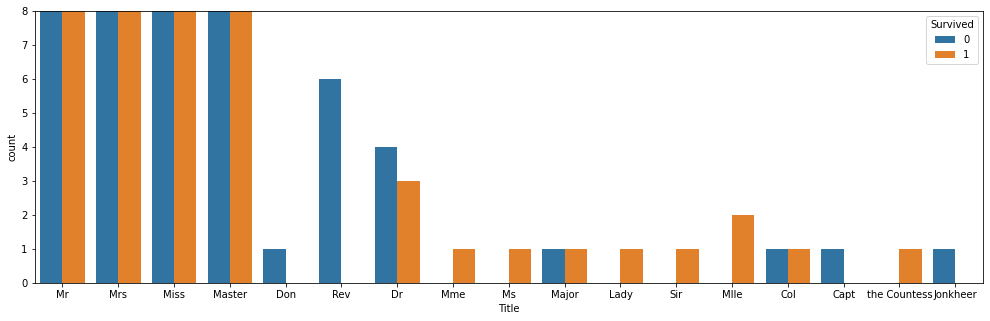

In [70]:
plt.figure(figsize=(17,5)) # 가로, 세로
sns.countplot(data=train, x='Title', hue='Survived')
plt.ylim(0,8)

- Mr, Mrs, Miss : 성별과 관련된 호칭. 모델 학습에 이용해봐도 괜찮을 것 같다.
- 나머지 호칭들은 인원수가 적고 종류가 많아서 범주를 통합시켜 보자!

In [71]:
# map 함수 사용하기
title_dic = {'Mr' : 'Mr',
             'Mrs' : 'Mrs',
             'Miss' : 'Miss',
             'Master' : 'Master',
             'Don' : 'Other',
             'Rev' : 'Other',
             'Dr' : 'Other',
             'Mme' : 'Other',
             'Ms' : 'Other',
             'Major' : 'Other',
             'Lady' : 'Other',
             'Sir' : 'Other',
             'Mlle' : 'Other',
             'Col' : 'Other',
             'Capt' : 'Other',
             'the Countess' : 'Other',
             'Jonkheer' : 'Other',
             'Dona' : 'Other'}

In [72]:
train['Title2'] = train['Title'].map(title_dic)

In [73]:
train['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [74]:
test['Title2'] = test['Title'].map(title_dic)

In [75]:
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [76]:
test['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [77]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [78]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,Family_Group,Title,Title2
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,M,S,2,Small,Mr,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,C,2,Small,Mrs,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,M,S,1,Alone,Miss,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C,S,2,Small,Mrs,Mrs
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,M,S,1,Alone,Mr,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,M,S,1,Alone,Rev,Other
887,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B,S,1,Alone,Miss,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,M,S,4,Small,Miss,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C,C,1,Alone,Mr,Mr


##### 티켓 정보는 사용하지 않겠다

##### 사용하지 않을 컬럼 정리

In [79]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Family_Size', 'Family_Group', 'Title',
       'Title2'],
      dtype='object')

In [80]:
train.drop(['Name', 'Ticket', 'Title'],axis=1, inplace=True)

In [81]:
test.drop(['Name', 'Ticket', 'Title'],axis=1, inplace=True)

In [82]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked', 'Family_Size', 'Family_Group', 'Title2'],
      dtype='object')

### 5. 모델링
- 인코딩(문자형태의 데이터를 숫자형태의 데이터로 변환)
    1. label encoding
    2. one-hot encoding
- 모델선택 및 하이퍼파라미터 조정
- 모델 학습
- 모델평가

In [83]:
pd.get_dummies(train['Title2']) # 원 핫 인코딩

,Master,Miss,Mr,Mrs,Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [84]:
train=pd.get_dummies(train)

In [85]:
test=pd.get_dummies(test)

In [86]:
print(train.shape)
print(test.shape)

(891, 29)
(418, 27)


In [87]:
# train, test의 차집합 연산
set(train.columns) - set(test.columns)

{'Cabin_T', 'Survived'}

In [88]:
# 새 컬럼 생성
test['Cabin_T'] = 0

In [89]:
test['Cabin_T']

0      0
1      0
2      0
3      0
4      0
      ..
413    0
414    0
415    0
416    0
417    0
Name: Cabin_T, Length: 418, dtype: int64

In [90]:
set(train.columns) - set(test.columns)

{'Survived'}

In [91]:
set(test.columns) - set(train.columns)

set()

In [92]:
train.head(1)

,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,3,22,1,0,7.25,2,0,1,0,...,0,1,0,1,0,0,0,1,0,0


In [93]:
test.head(1)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other,Cabin_T
0,3,34,0,0,7.8292,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0


##### 문제, 정답 나누기

In [98]:

X_train = train.drop('Survived', axis=1)
y_train = train['Survived'] # Survived

In [95]:
train.drop('Survived', axis=1)

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,22,1,0,7.2500,2,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,38,1,0,71.2833,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,35,1,0,53.1000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
887,1,19,0,0,30.0000,1,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
888,3,21,1,2,23.4500,4,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,26,0,0,30.0000,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [99]:
X_train

,Pclass,Age,SibSp,Parch,Fare,Family_Size,Sex_female,Sex_male,Cabin_A,Cabin_B,...,Embarked_Q,Embarked_S,Family_Group_Alone,Family_Group_Small,Family_Group_Large,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,3,22,1,0,7.2500,2,0,1,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,38,1,0,71.2833,2,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,3,26,0,0,7.9250,1,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0
3,1,35,1,0,53.1000,2,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,3,35,0,0,8.0500,1,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27,0,0,13.0000,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
887,1,19,0,0,30.0000,1,1,0,0,1,...,0,1,1,0,0,0,1,0,0,0
888,3,21,1,2,23.4500,4,1,0,0,0,...,0,1,0,1,0,0,1,0,0,0
889,1,26,0,0,30.0000,1,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [100]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [101]:
# y_test는 kaggle에 있음!!
X_test=test

In [102]:
print(X_train.shape)
print(X_test.shape)

(891, 28)
(418, 28)


In [103]:
# 컬럼 확인하기
X_train.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

In [104]:
# 컬럼 순서 맞추기
X_test = X_test[X_train.columns]

In [105]:
X_test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family_Size', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Cabin_T', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_Group_Alone', 'Family_Group_Small',
       'Family_Group_Large', 'Title2_Master', 'Title2_Miss', 'Title2_Mr',
       'Title2_Mrs', 'Title2_Other'],
      dtype='object')

##### 모델 선택

In [106]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [107]:
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

##### train, validation 분리

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_val, y_train, y_val =train_test_split(X_train, y_train)

In [110]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(668, 28) (668,)
(223, 28) (223,)


##### 모델 학습 및 평가

In [111]:
knn_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
knn_model.score(X_val, y_val)

0.7085201793721974

In [113]:
tree_model.score(X_val, y_val)

0.7892376681614349

##### 교차검증

In [114]:
from sklearn.model_selection import cross_val_score

In [117]:
knn_result = cross_val_score(knn_model, X_train, y_train, cv=5)
knn_result

array([0.76865672, 0.7238806 , 0.70149254, 0.73684211, 0.70676692])

In [118]:
knn_result.mean()

0.7275277746605319

In [122]:
tree_result = cross_val_score(tree_model, X_train, y_train, cv=5)

In [123]:
tree_result.mean()

0.7709572438559086

##### 하이퍼파라미터 튜닝

In [124]:
# knn - n_neighbors
score_list = []
for k in range(1, 150, 2): # 이웃의 수(k)가 클루록 단순, 적을수록 복잡한 모델링
    knn_model = KNeighborsClassifier(n_neighbors=k) # 이웃수에 따른 모델 생성
    knn_result = cross_val_score(knn_model, X_train, y_train, cv=5) # 교차 검증
    score_list.append(knn_result.mean()) # 교차 검증의 평균치

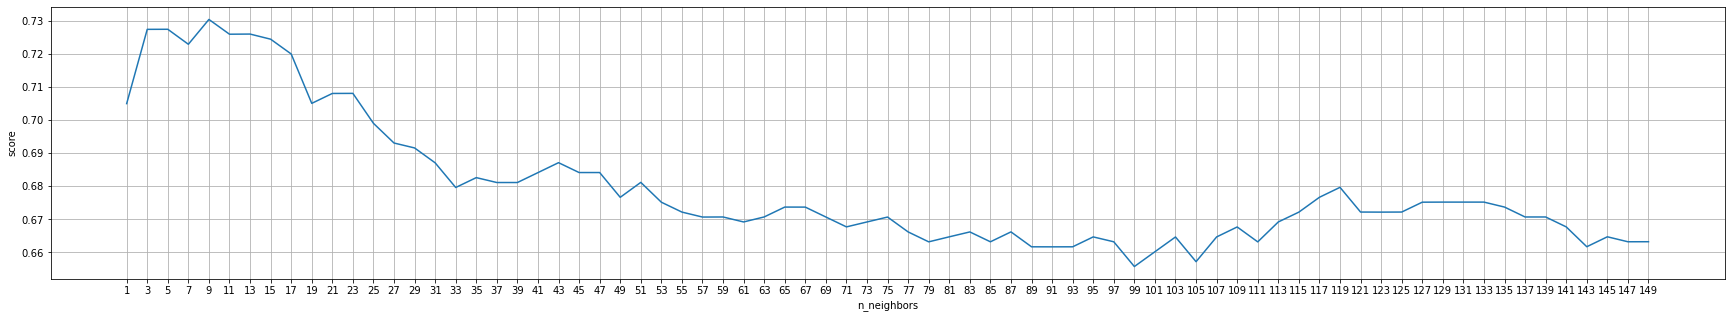

In [125]:
plt.figure(figsize=(30, 5))
plt.plot(range(1, 150, 2), score_list)
plt.xticks(range(1, 150, 2))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [126]:
# DecisionTree - max_dept
score_list = []

for d in range(1, 100): # 이웃의 수(k)가 클루록 단순, 적을수록 복잡한 모델링
    tree_model = DecisionTreeClassifier(max_depth=d) # 이웃수에 따른 모델 생성
    tree_result = cross_val_score(tree_model, X_train, y_train, cv=5) # 교차 검증
    score_list.append(tree_result.mean()) # 교차 검증의 평균치

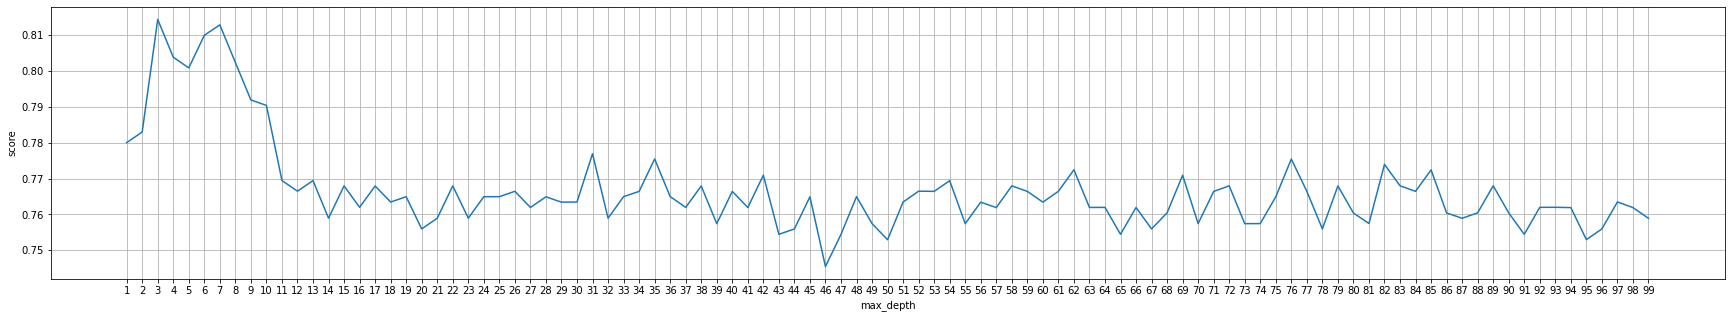

In [127]:
plt.figure(figsize=(30, 5))
plt.plot(range(1, 100), score_list)
plt.xticks(range(1, 100))
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

##### KNN Scaler적용

In [128]:
from sklearn.preprocessing import StandardScaler

In [129]:
# scaler 생성
scaler = StandardScaler()

In [130]:
# scaler를 X_train에 맞추기
scaler.fit(X_train)

StandardScaler()

In [132]:
transform_X_train = scaler.transform(X_train)

In [134]:
# scaler를 fit -> train 데이터 사용
# 그대로 X_test 데이터에 적용
transform_X_test = scaler.transform(X_test)
transform_X_test

array([[ 0.81509978,  0.37788371, -0.47061437, ...,  0.84949955,
        -0.39460023, -0.16159725],
       [ 0.81509978,  1.33711849,  0.40263674, ..., -1.17716366,
         2.53421037, -0.16159725],
       [-0.36599925,  2.44392785, -0.47061437, ...,  0.84949955,
        -0.39460023, -0.16159725],
       ...,
       [ 0.81509978,  0.67303288, -0.47061437, ...,  0.84949955,
        -0.39460023, -0.16159725],
       [ 0.81509978, -0.21241461, -0.47061437, ...,  0.84949955,
        -0.39460023, -0.16159725],
       [ 0.81509978, -0.21241461,  0.40263674, ..., -1.17716366,
        -0.39460023, -0.16159725]])

In [137]:
# 하이퍼파라미터 튜닝 - transform_X_train 이용해서
# knn - n_neighbors
score_list = []
for k in range(1, 150, 2): # 이웃의 수(k)가 클루록 단순, 적을수록 복잡한 모델링
    knn_model = KNeighborsClassifier(n_neighbors=k) # 이웃수에 따른 모델 생성
    knn_result = cross_val_score(knn_model, transform_X_train, y_train, cv=5) # 교차 검증
    score_list.append(knn_result.mean()) # 교차 검증의 평균치

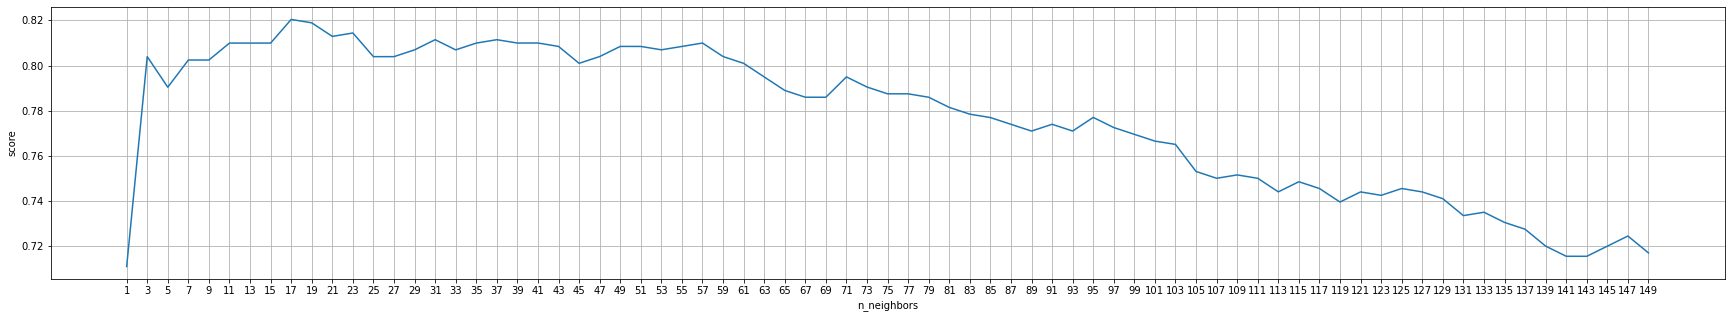

In [138]:
plt.figure(figsize=(30, 5))
plt.plot(range(1, 150, 2), score_list)
plt.xticks(range(1, 150, 2))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()